In [1]:
import os
import pandas as pd
import numpy as np

df_lifelines = pd.read_csv('rawLifeLines.csv')
df_ukb = pd.read_csv('rawUKB.csv')
df_ukb.columns

Index(['eid', 'Anhedonia', 'Depressed mood', 'Sleep problems', 'Fatigue',
       'Appetite changes', 'Feelings of inadequacy', 'Cognitive problems',
       'Psychomotor changes', 'Suicidal ideation', 'Anxiety',
       'Worrying control', 'Foreboding', 'Lack of relaxation', 'Restlessness',
       'Irritability', 'Generalized worrying', 'Childhood trauma score',
       'Physically abused by family as a child',
       'Felt hated by family member as a child',
       'Sexually molested as a child',
       'Someone to take to doctor when needed as a child', 'Felt loved',
       'Antidepressant use', 'Age', 'Gender', 'Smoking status', 'Diabetes',
       'Physical activity', 'Cholesterol', 'HDL cholesterol',
       'LDL cholesterol', 'Triglycerides', 'Glucose', 'Glycated haemoglobin',
       'CVD', 'Hypertension', 'Systolic blood pressure',
       'Diastolic blood pressure', 'CVD Family history',
       'Depressive symptoms score', 'Anxiety symptoms score'],
      dtype='object')

In [2]:
print("Lifelines Glucose Range (mmol/L):", df_lifelines['Triglycerides'].min(), "-", df_lifelines['Triglycerides'].max())
print("UK Biobank Glucose Range (mmol/L):", df_ukb['Triglycerides'].min(), "-", df_ukb['Triglycerides'].max())

Lifelines Glucose Range (mmol/L): 0.01 - 37.31
UK Biobank Glucose Range (mmol/L): 0.238 - 11.278


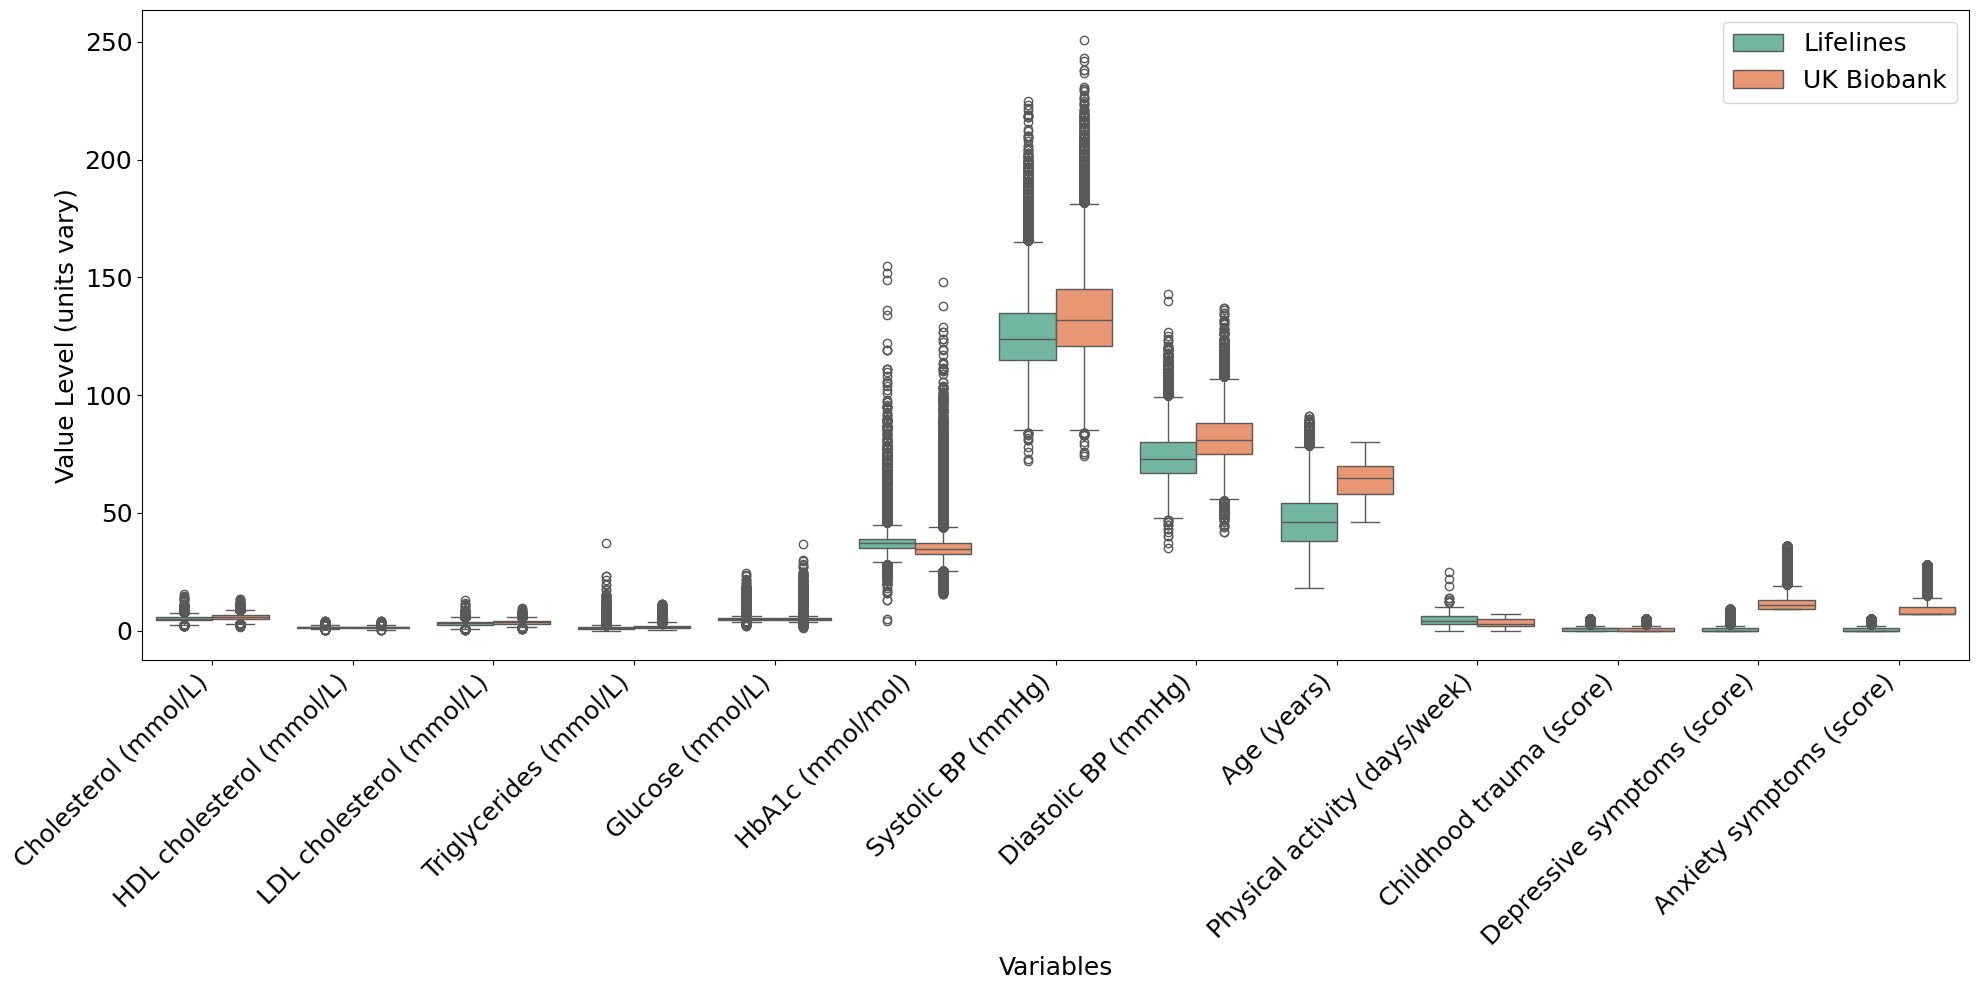

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Add dataset identifier
df_lifelines['Dataset'] = 'Lifelines'
df_ukb['Dataset'] = 'UK Biobank'

# Combine dataframes
combined_df = pd.concat([df_lifelines, df_ukb])

# Columns of interest (original names)
columns_of_interest = [
    'Cholesterol', 'HDL cholesterol', 'LDL cholesterol', 
    'Triglycerides', 'Glucose', 'Glycated haemoglobin',
    'Systolic blood pressure', 'Diastolic blood pressure', 'Age', 
    'Physical activity', 'Childhood trauma score', 
    'Depressive symptoms score', 'Anxiety symptoms score'
]

# Map original names to labeled names (with units)
variable_labels = {
    'Cholesterol': 'Cholesterol (mmol/L)',
    'HDL cholesterol': 'HDL cholesterol (mmol/L)',
    'LDL cholesterol': 'LDL cholesterol (mmol/L)',
    'Triglycerides': 'Triglycerides (mmol/L)',
    'Glucose': 'Glucose (mmol/L)',
    'Glycated haemoglobin': 'HbA1c (mmol/mol)',
    'Systolic blood pressure': 'Systolic BP (mmHg)',
    'Diastolic blood pressure': 'Diastolic BP (mmHg)',
    'Age': 'Age (years)',
    'Physical activity': 'Physical activity (days/week)',  # Adjust if units differ
    'Childhood trauma score': 'Childhood trauma (score)',
    'Depressive symptoms score': 'Depressive symptoms (score)',
    'Anxiety symptoms score': 'Anxiety symptoms (score)'
}

# Filter numeric columns
numeric_columns = [col for col in columns_of_interest if np.issubdtype(combined_df[col].dtype, np.number)]

# Melt the dataframe
melted_df = combined_df.melt(
    id_vars=['Dataset'], 
    value_vars=numeric_columns,
    var_name='Variable', 
    value_name='Value'
)

# Replace variable names with labeled versions
melted_df['Variable'] = melted_df['Variable'].map(variable_labels)

# Plot
plt.figure(figsize=(20, 10))
ax = sns.boxplot(
    x='Variable', 
    y='Value', 
    hue='Dataset', 
    data=melted_df, 
    palette='Set2'
)

# Improve aesthetics
plt.xticks(rotation=45, fontsize=18, ha='right')  # Rotate for readability
plt.yticks(fontsize=18)
plt.xlabel('Variables', fontsize=18)
plt.ylabel('Value Level (units vary)', fontsize=18)
plt.legend(fontsize=18, title='', title_fontsize=18)

plt.tight_layout()
plt.savefig("combined_boxplot_with_units.tiff", dpi=600, bbox_inches='tight')
plt.show()